### Import Necessary Libraries

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Load Data

In [86]:
df = pd.read_excel("Under Death 5 - WHO.xlsx", sheet_name = "Data")

In [55]:
df.head()

,Indicator,Year,Country,Global,WHO region,World bank income group,Age group,Cause,Datasource short,Datasource long,Value Numeric,Value String
0,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Birth asphyxia and birth trauma,MCEE,Maternal and Child Epidemiology Estimation (MCEE),278103.80,278103.80
1,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Tetanus,MCEE,Maternal and Child Epidemiology Estimation (MCEE),20040.15,20040.15
2,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,HIV/AIDS,MCEE,Maternal and Child Epidemiology Estimation (MCEE),222929.00,222929.00
3,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Sepsis and other infectious conditions of the ...,MCEE,Maternal and Child Epidemiology Estimation (MCEE),96900.48,96900.48
4,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Tuberculosis,MCEE,Maternal and Child Epidemiology Estimation (MCEE),35446.09,35446.09


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56280 entries, 0 to 56279
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Indicator        56280 non-null  object 
 1   Year             56280 non-null  int64  
 2   Country          54320 non-null  object 
 3   Region           56280 non-null  object 
 4   Income_group     53480 non-null  object 
 5   Age_group        56280 non-null  object 
 6   Cause            56280 non-null  object 
 7   Datasource_long  56280 non-null  object 
 8   Value_Numeric    56280 non-null  float64
 9   Value String     56280 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [48]:
df.columns

Index(['Indicator', 'Year', 'Country', 'Global', 'WHO region',
       'World bank income group', 'Age group', 'Cause', 'Datasource short',
       'Datasource long', 'Value Numeric', 'Value String'],
      dtype='object')

In [49]:
df.shape

(56280, 12)

#### Data Cleaning

* Take a copy of the dataset. Any changes made on the copy will not affect the main dataset.
* Change the name of column to avoid syntax errors
* Use describe to roughly check the average deaths in total
* Check for null values
* Remove unwanted columns
* check if Global column below is sum of all the other regions,
* if yes remove the column Global and remove the rows which says global under region
* Check if Value_Numeric and Value_string have same values
* if yes remove the column Value_string

In [87]:
copy_df = df.copy()

In [39]:
copy_df.head()

,Indicator,Year,Country,Global,WHO region,World bank income group,Age group,Cause,Datasource short,Datasource long,Value Numeric,Value String
0,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Birth asphyxia and birth trauma,MCEE,Maternal and Child Epidemiology Estimation (MCEE),278103.80,278103.80
1,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Tetanus,MCEE,Maternal and Child Epidemiology Estimation (MCEE),20040.15,20040.15
2,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,HIV/AIDS,MCEE,Maternal and Child Epidemiology Estimation (MCEE),222929.00,222929.00
3,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Sepsis and other infectious conditions of the ...,MCEE,Maternal and Child Epidemiology Estimation (MCEE),96900.48,96900.48
4,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Tuberculosis,MCEE,Maternal and Child Epidemiology Estimation (MCEE),35446.09,35446.09


In [40]:
copy_df.shape

(56280, 12)

In [88]:
### Remove unwanted columns

df['Datasource short'].unique()

array(['MCEE'], dtype=object)

Since there is only one unique value, We can delete this column

In [89]:
df.drop(columns='Datasource short',axis = 1 , inplace = True)

In [146]:
df['Indicator'].unique()

array(['Number of under-five deaths - by cause'], dtype=object)

In [150]:
df['Age_group'].unique()

array(['0-4'], dtype=object)

In [153]:
df['Datasource_long'].unique()

array(['Maternal and Child Epidemiology Estimation (MCEE)'], dtype=object)

In [154]:
df.drop(['Indicator','Age_group','Datasource_long'], axis = 1, inplace = True)

C:\Users\HP-LAPTOP\AppData\Local\Temp\ipykernel_9112\668531721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Indicator','Age_group','Datasource_long'], axis = 1, inplace = True)


Since the Dataset is about the death rates of age group under 5 years globally, taken from WHO website -

* Indicator - "Number of under-five deaths - by cause"

* Age Group = 0-4

* Datasource_short = "MCEE"

* Datasource_long = "Maternal and Child Epidemiology Estimation (MCEE)"

are the unique values present in their respective columns


In [90]:
df.head()

,Indicator,Year,Country,Global,WHO region,World bank income group,Age group,Cause,Datasource long,Value Numeric,Value String
0,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Birth asphyxia and birth trauma,Maternal and Child Epidemiology Estimation (MCEE),278103.80,278103.80
1,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Tetanus,Maternal and Child Epidemiology Estimation (MCEE),20040.15,20040.15
2,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,HIV/AIDS,Maternal and Child Epidemiology Estimation (MCEE),222929.00,222929.00
3,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Sepsis and other infectious conditions of the ...,Maternal and Child Epidemiology Estimation (MCEE),96900.48,96900.48
4,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Tuberculosis,Maternal and Child Epidemiology Estimation (MCEE),35446.09,35446.09


In [91]:
###  Change the name of column to avoid syntax errors

names = {'WHO region': 'Region',
        'World bank income group': 'Income_group',
        'Age group': 'Age_group',
        'Datasource short': 'Datasource_short',
       'Datasource long': 'Datasource_long',
       'Value Numeric': 'Value_Numeric'}


df.rename(columns=names , inplace = True)

In [92]:
df.head()

,Indicator,Year,Country,Global,Region,Income_group,Age_group,Cause,Datasource_long,Value_Numeric,Value String
0,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Birth asphyxia and birth trauma,Maternal and Child Epidemiology Estimation (MCEE),278103.80,278103.80
1,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Tetanus,Maternal and Child Epidemiology Estimation (MCEE),20040.15,20040.15
2,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,HIV/AIDS,Maternal and Child Epidemiology Estimation (MCEE),222929.00,222929.00
3,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Sepsis and other infectious conditions of the ...,Maternal and Child Epidemiology Estimation (MCEE),96900.48,96900.48
4,Number of under-five deaths - by cause,2000,NaN,NaN,Africa,NaN,0-4,Tuberculosis,Maternal and Child Epidemiology Estimation (MCEE),35446.09,35446.09


In [93]:
### Use describe to roughly check the average deaths in total


df.describe()

,Year,Value_Numeric,Value String
count,56280.000000,5.628000e+04,5.628000e+04
mean,2009.500000,7.740294e+03,7.740294e+03
std,5.766333,5.591457e+04,5.591457e+04
min,2000.000000,0.000000e+00,0.000000e+00
25%,2004.750000,1.631942e+00,1.631942e+00
50%,2009.500000,6.478563e+01,6.478563e+01
75%,2014.250000,1.051000e+03,1.051000e+03
max,2019.000000,1.645626e+06,1.645626e+06


In [94]:
### Check for null values

df.isnull().sum().sort_values(ascending = False)

Global             56000
Income_group        2800
Country             1960
Indicator              0
Year                   0
Region                 0
Age_group              0
Cause                  0
Datasource_long        0
Value_Numeric          0
Value String           0
dtype: int64

There are 56000 null values in Global, 2800 in Income-group, and 1960 NA data in Country

In [95]:
### check if Global column below is sum of all the other regions

df['Global'].value_counts()

Global    280
Name: Global, dtype: int64

In [96]:
df['Region'].value_counts()

Europe                   15120
Africa                   13440
Americas                 10080
Western Pacific           7840
Eastern Mediterranean     6160
South-East Asia           3360
Global                     280
Name: Region, dtype: int64

In [97]:
len(df[(df['Global'] == 'Global') & (df['Region'] == 'Global')])

280

Since Global column has records of 280 which is already present in region column under global so can delete Global column

In [98]:
df.drop('Global', axis = 1 , inplace = True)

In [137]:
df[df['Region'] == 'Global'].groupby("Cause").agg({'Value_Numeric':'sum'})*2

# from below table it is evident that Global category is twice the summation of all other regions.

,Value_Numeric
Cause,
Acute lower respiratory infections,4.577068e+07
Birth asphyxia and birth trauma,3.152006e+07
Congenital anomalies,1.757878e+07
Diarrhoeal diseases,3.170744e+07
HIV/AIDS,6.138363e+06
Injuries,1.164935e+07
Malaria,2.279462e+07
Measles,8.870934e+06
Meningitis/encephalitis,6.949188e+06


In [136]:
df[df['Region'] != 'Global'].groupby("Cause").agg({'Value_Numeric':'sum'})

,Value_Numeric
Cause,
Acute lower respiratory infections,4.577068e+07
Birth asphyxia and birth trauma,3.152006e+07
Congenital anomalies,1.757878e+07
Diarrhoeal diseases,3.170744e+07
HIV/AIDS,6.138363e+06
Injuries,1.164935e+07
Malaria,2.279462e+07
Measles,8.870934e+06
Meningitis/encephalitis,6.949188e+06


Global in the Region column is the combination of twice of all the other regions values based on the causes of death i.e (Global column + "Global" in Region column). So can remove "Global" category from Region column.

In [140]:
df = (df[df['Region'] != 'Global'])

In [156]:
df.head()

,Year,Country,Region,Income_group,Cause,Value_Numeric
0,2000,NaN,Africa,NaN,Birth asphyxia and birth trauma,278103.80
1,2000,NaN,Africa,NaN,Tetanus,20040.15
2,2000,NaN,Africa,NaN,HIV/AIDS,222929.00
3,2000,NaN,Africa,NaN,Sepsis and other infectious conditions of the ...,96900.48
4,2000,NaN,Africa,NaN,Tuberculosis,35446.09


In [99]:
### Check if Value_Numeric and Value_string have same values


len(df[df['Value_Numeric'] == df['Value String']])

56280

Since the values in value_Numeric and value Stirng are same, can delete value string column

In [100]:
df.drop('Value String', axis = 1, inplace = True)

In [157]:
df.shape

(56000, 6)

## Exploratory Analysis and Visualisation

### Problem Statement
#### Year
* Is there a correlation between the year and mortality rates
* Which cause was the reason for highest death rates every year

#### Cause
* Maximum death rates by each cause
* Which cause was the reason for most no of deaths overall
* Total death rate due to each cause throughout the years

#### Region
* Which region(along with the cause) has the highest death rates due to vaccine preventable diseases
* What is the cause for highest death rates due to vaccine preventable diseases
* Which region has the highest death rates due to vaccine preventable diseases
* Which region has the highest number of under 5 mortality rates
* Death rates by contagious diseases(ALRTI,Sepsis and other infectious conditions of the newborn,HIV,diarrhoeal diseases) and other disease conditions in all the regions
* Look for South east region death rate distribution
* Look for India's data

#### Income group
* Which income group people have most death rates
* Take out Income group for all the countries
* Find out the which Region has which income groups

In [160]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

### I. Year

#### 1. Correlation between year and death rates

In [164]:
death_rates_yoy = df.groupby('Year').sum()
death_rates_yoy

,Value_Numeric
Year,
2000,1.983554e+07
2001,1.924353e+07
2002,1.852609e+07
2003,1.803903e+07
2004,1.742043e+07
2005,1.665648e+07
2006,1.592487e+07
2007,1.525364e+07
2008,1.483252e+07


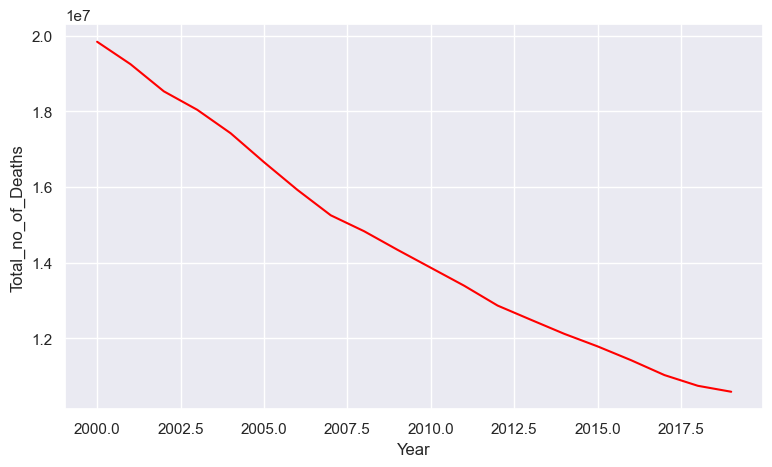

In [175]:
sns.set(style="darkgrid")
sns.lineplot(data = death_rates_yoy , x = 'Year', y ='Value_Numeric', color = 'red')

plt.ylabel("Total_no_of_Deaths")
plt.show()

In [176]:
Total_no_of_deaths = df.Value_Numeric.sum()
Total_no_of_deaths

290415822.7919204

#### 2.Which cause was the reason for highest death rates every year

In [177]:
df.columns

Index(['Year', 'Country', 'Region', 'Income_group', 'Cause', 'Value_Numeric'], dtype='object')

In [269]:
cause = df.groupby(['Year','Cause']).sum().sort_values(['Year','Value_Numeric'],ascending = False).reset_index()
highest_death_rates = cause.groupby('Year').first().reset_index()
highest_death_rates

,Year,Cause,Value_Numeric
0,2000,Acute lower respiratory infections,3.291253e+06
1,2001,Acute lower respiratory infections,3.142394e+06
2,2002,Acute lower respiratory infections,3.071055e+06
3,2003,Acute lower respiratory infections,2.964245e+06
4,2004,Acute lower respiratory infections,2.858787e+06
5,2005,Acute lower respiratory infections,2.742521e+06
6,2006,Acute lower respiratory infections,2.614655e+06
7,2007,Acute lower respiratory infections,2.482784e+06
8,2008,Prematurity,2.431191e+06
9,2009,Prematurity,2.382248e+06


From the year 2000 to 2007 Acute lower respiratory infections has been the reason for max death rates, followed by Prematurity being the cause of max death rates from the year 2008 to 2019

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '2000'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007'),
  Text(8, 0, '2008'),
  Text(9, 0, '2009'),
  Text(10, 0, '2010'),
  Text(11, 0, '2011'),
  Text(12, 0, '2012'),
  Text(13, 0, '2013'),
  Text(14, 0, '2014'),
  Text(15, 0, '2015'),
  Text(16, 0, '2016'),
  Text(17, 0, '2017'),
  Text(18, 0, '2018'),
  Text(19, 0, '2019')])

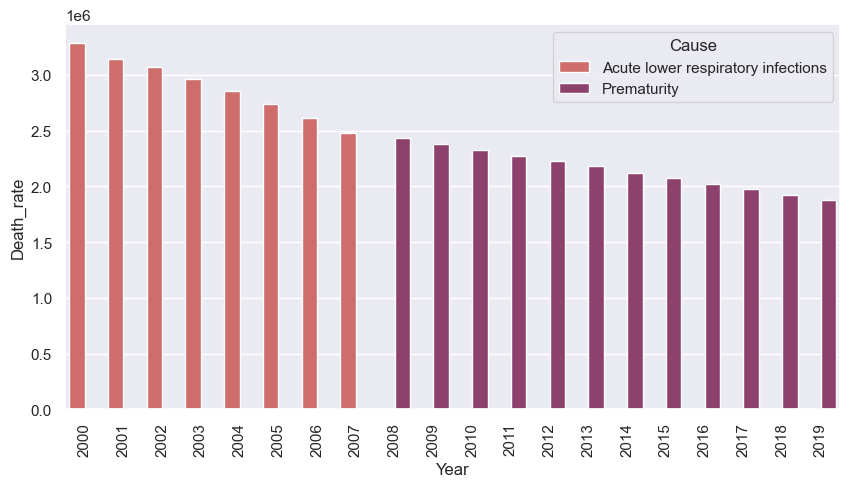

In [272]:
sns.barplot(x ='Year', y ='Value_Numeric', hue="Cause", data = highest_death_rates,  
            palette ='flare')
plt.xlabel("Year")
plt.ylabel("Death_rate")
plt.rcParams['figure.figsize']=(10,5)
plt.xticks(rotation=90)

### II. Cause

#### 1. Maximum death rates by each cause

In [300]:
max_death = pd.DataFrame(df.groupby('Cause')['Value_Numeric'].max().sort_values(ascending = False)).reset_index()
max_death

,Cause,Value_Numeric
0,Malaria,764140.30
1,Other Group 1 and Other noncommunicable (neona...,667922.10
2,Acute lower respiratory infections,663216.70
3,Prematurity,595068.90
4,Diarrhoeal diseases,559274.00
5,Birth asphyxia and birth trauma,388137.60
6,Measles,318581.00
7,HIV/AIDS,223462.50
8,Congenital anomalies,137793.20
9,Injuries,133578.30


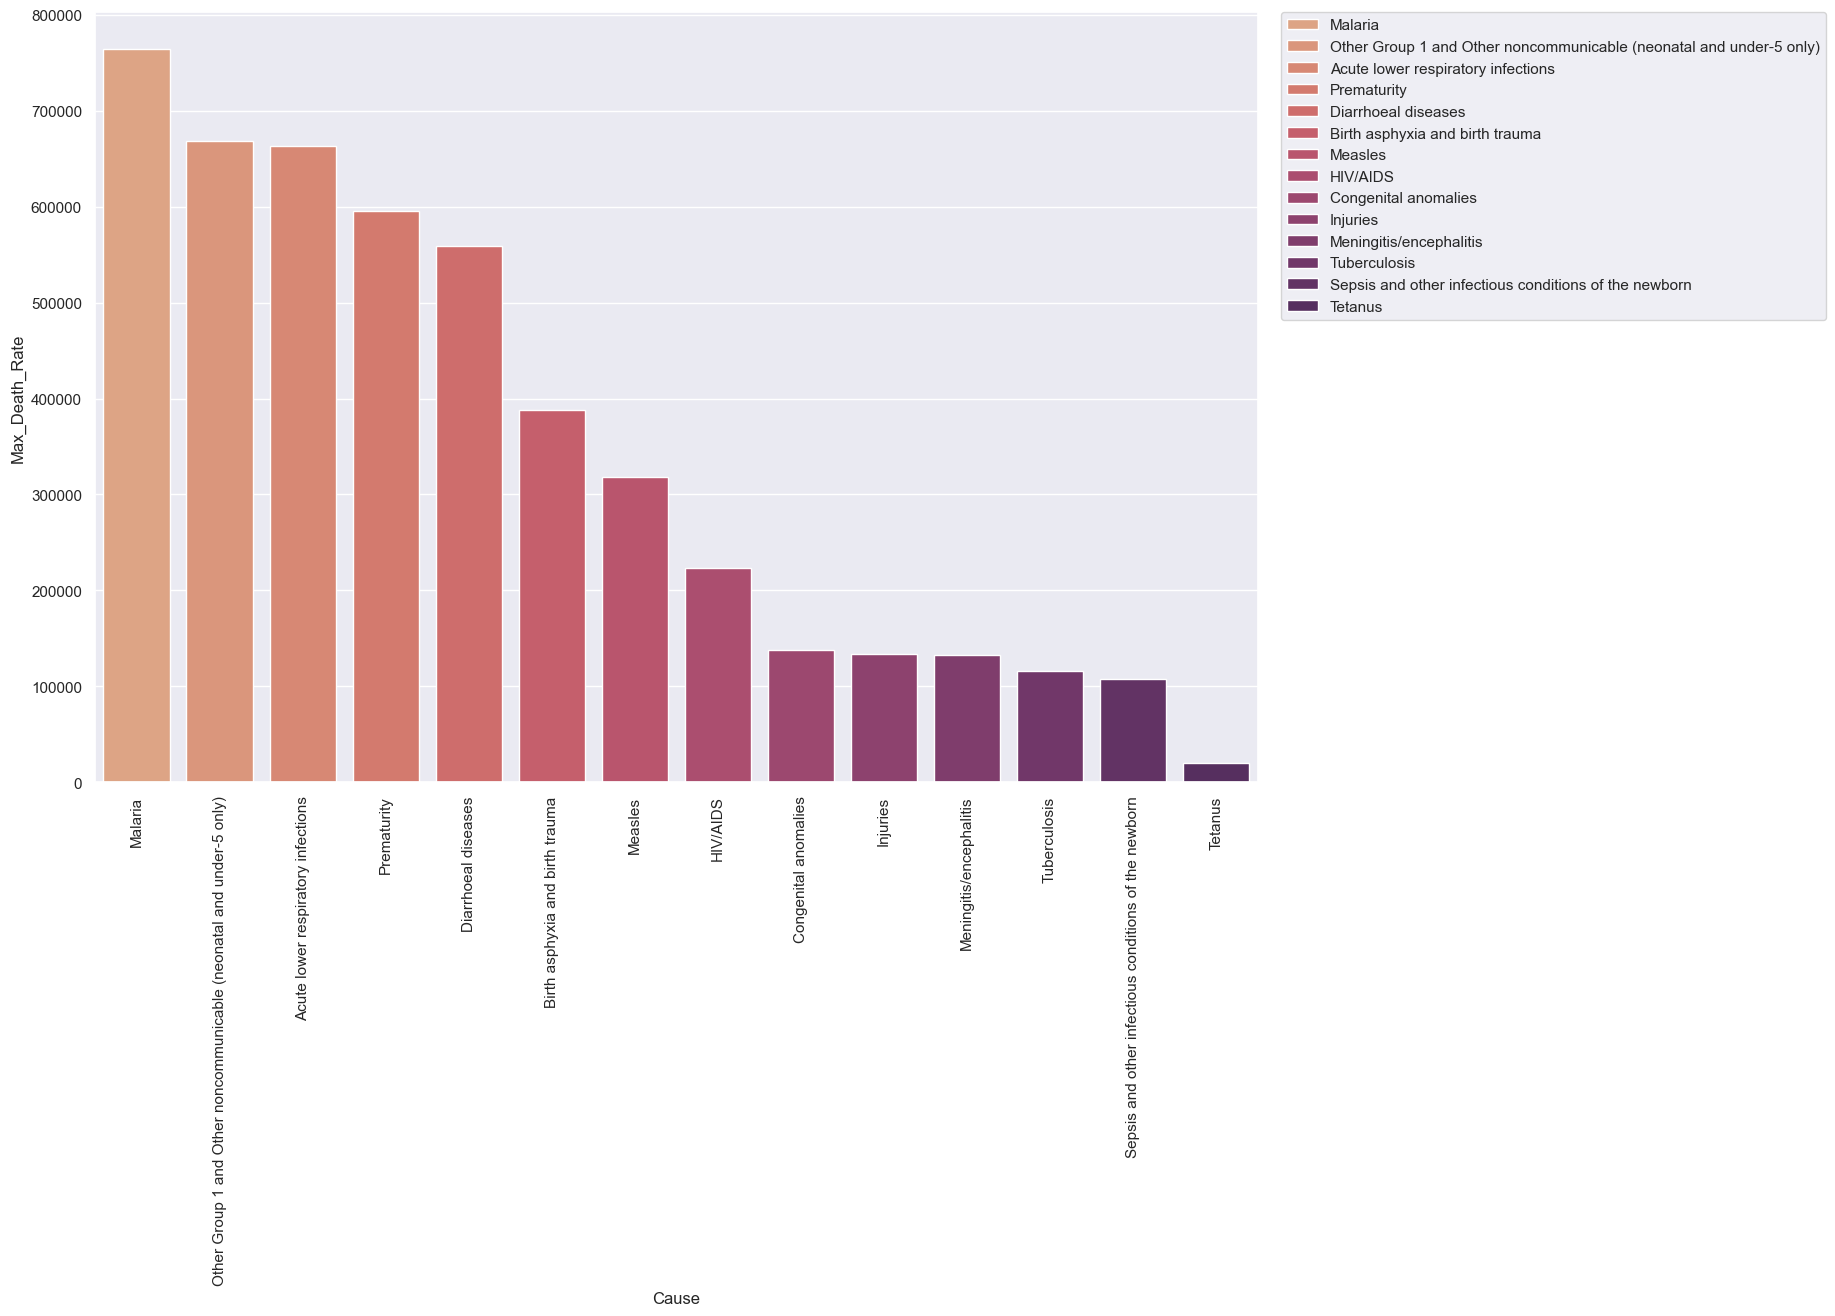

In [301]:
sns.barplot(x ='Cause', y ='Value_Numeric', hue="Cause", data = max_death,  
            palette ='flare',dodge = False)
plt.ylabel("Max_Death_Rate")
plt.rcParams['figure.figsize']=(15,10)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

Malaria has the highest max deaths, followed by other non communicable diseases, Acute lower respiratory infections, prematurity 
and Diarrhoeal diseases.

#### 2. Which cause was the reason for most no. of deaths overall

In [322]:
most_deaths = df.groupby('Cause').sum().reset_index().sort_values(by = 'Value_Numeric', ascending = False)
most_deaths = most_deaths[['Cause','Value_Numeric']].iloc[:2]
most_deaths

,Cause,Value_Numeric
10,Prematurity,4.724125e+07
0,Acute lower respiratory infections,4.577068e+07


Prematurity and Acute lower respiratory infections has been the cause for max death rates

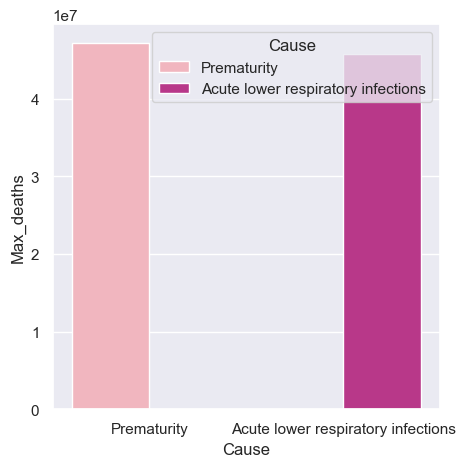

In [325]:
sns.barplot(x ='Cause', y ='Value_Numeric', hue="Cause", data = most_deaths,  
            palette ='RdPu')
plt.ylabel("Max_deaths")
plt.rcParams['figure.figsize']=(5,5)

#### 3.Total death rate due to each cause throughout the years

In [334]:
total_deaths = df.groupby(["Year","Cause"])['Value_Numeric'].sum()
total_deaths = pd.DataFrame(total_deaths).reset_index()
total_deaths

,Year,Cause,Value_Numeric
0,2000,Acute lower respiratory infections,3.291253e+06
1,2000,Birth asphyxia and birth trauma,2.003623e+06
2,2000,Congenital anomalies,9.051241e+05
3,2000,Diarrhoeal diseases,2.495018e+06
4,2000,HIV/AIDS,4.917775e+05
5,2000,Injuries,6.245146e+05
6,2000,Malaria,1.562096e+06
7,2000,Measles,9.552642e+05
8,2000,Meningitis/encephalitis,5.171694e+05
9,2000,Other Group 1 and Other noncommunicable (neona...,3.041052e+06


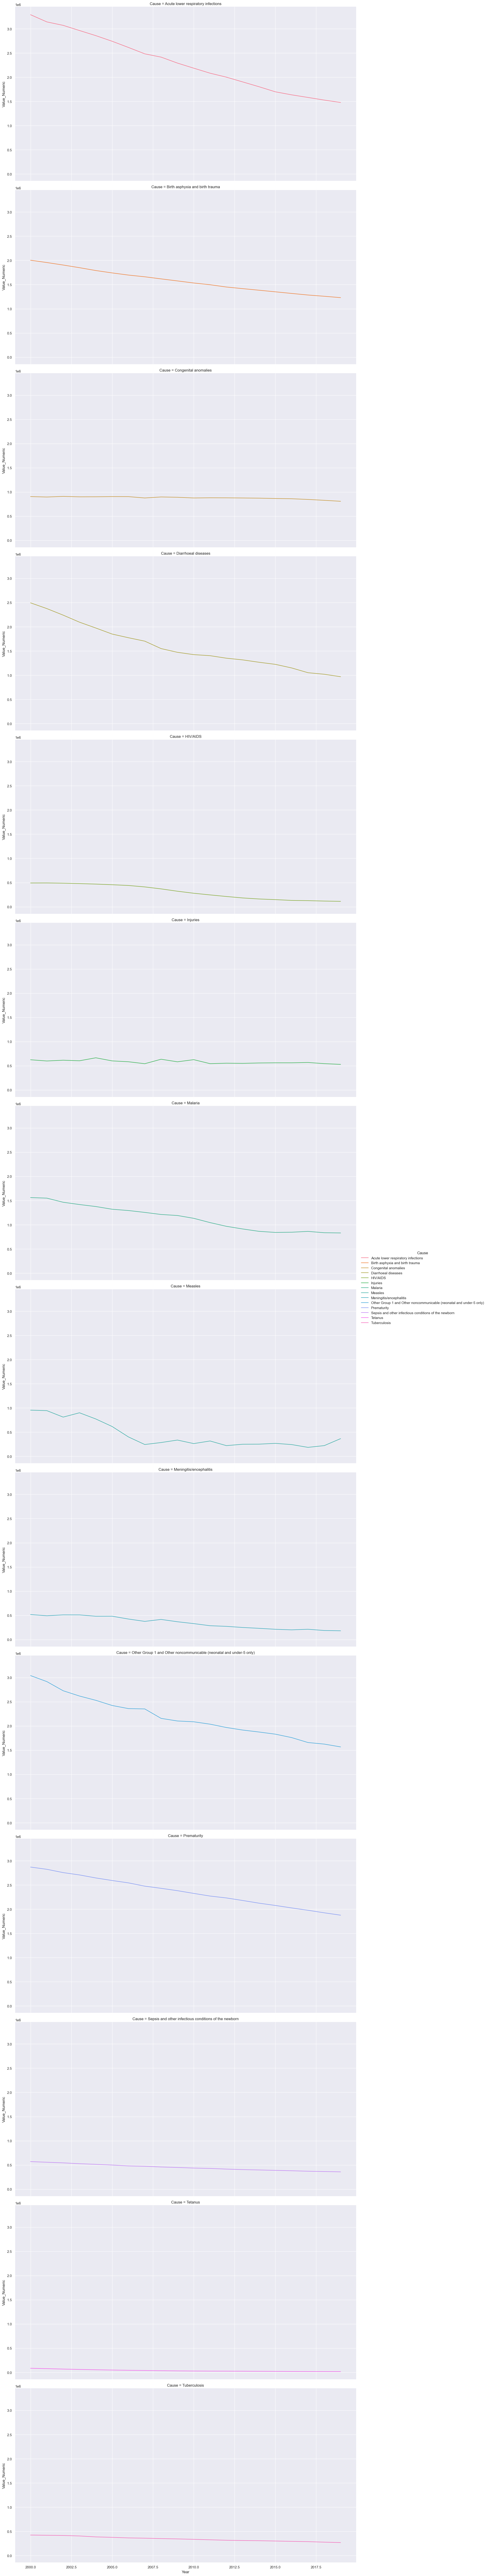

In [335]:
sns.relplot(
    data=total_deaths, kind="line",
    x="Year", y="Value_Numeric", hue="Cause",row='Cause',height=8, aspect=2
)

### III. Region

#### 1. Which cause and region has the highest(max) overall under5 death rates

In [364]:
cause = df.groupby(['Region','Cause']).sum().sort_values(['Value_Numeric'],ascending = False).reset_index()[['Region','Cause','Value_Numeric']]
highest_death_rates = cause.groupby('Region').first().reset_index()
highest_death_rates

,Region,Cause,Value_Numeric
0,Africa,Acute lower respiratory infections,2.252253e+07
1,Americas,Prematurity,2.469195e+06
2,Eastern Mediterranean,Prematurity,7.763020e+06
3,Europe,Prematurity,1.357330e+06
4,South-East Asia,Prematurity,1.744918e+07
5,Western Pacific,Prematurity,3.712904e+06


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Americas'),
  Text(2, 0, 'Eastern Mediterranean'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'South-East Asia'),
  Text(5, 0, 'Western Pacific')])

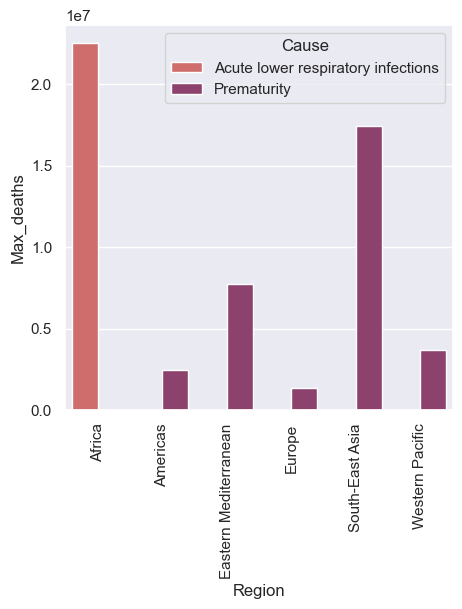

In [365]:
sns.barplot(x ='Region', y ='Value_Numeric', hue="Cause", data = highest_death_rates, palette = 'flare')
ylabel = "Max_deaths"
plt.ylabel(ylabel)
plt.rcParams['figure.figsize']=(15,13)
plt.xticks(rotation=90)

Africa had the highest death rates due to Acute lower respiratory infections and all other by Prematurity

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Americas'),
  Text(2, 0, 'Eastern Mediterranean'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'South-East Asia'),
  Text(5, 0, 'Western Pacific')])

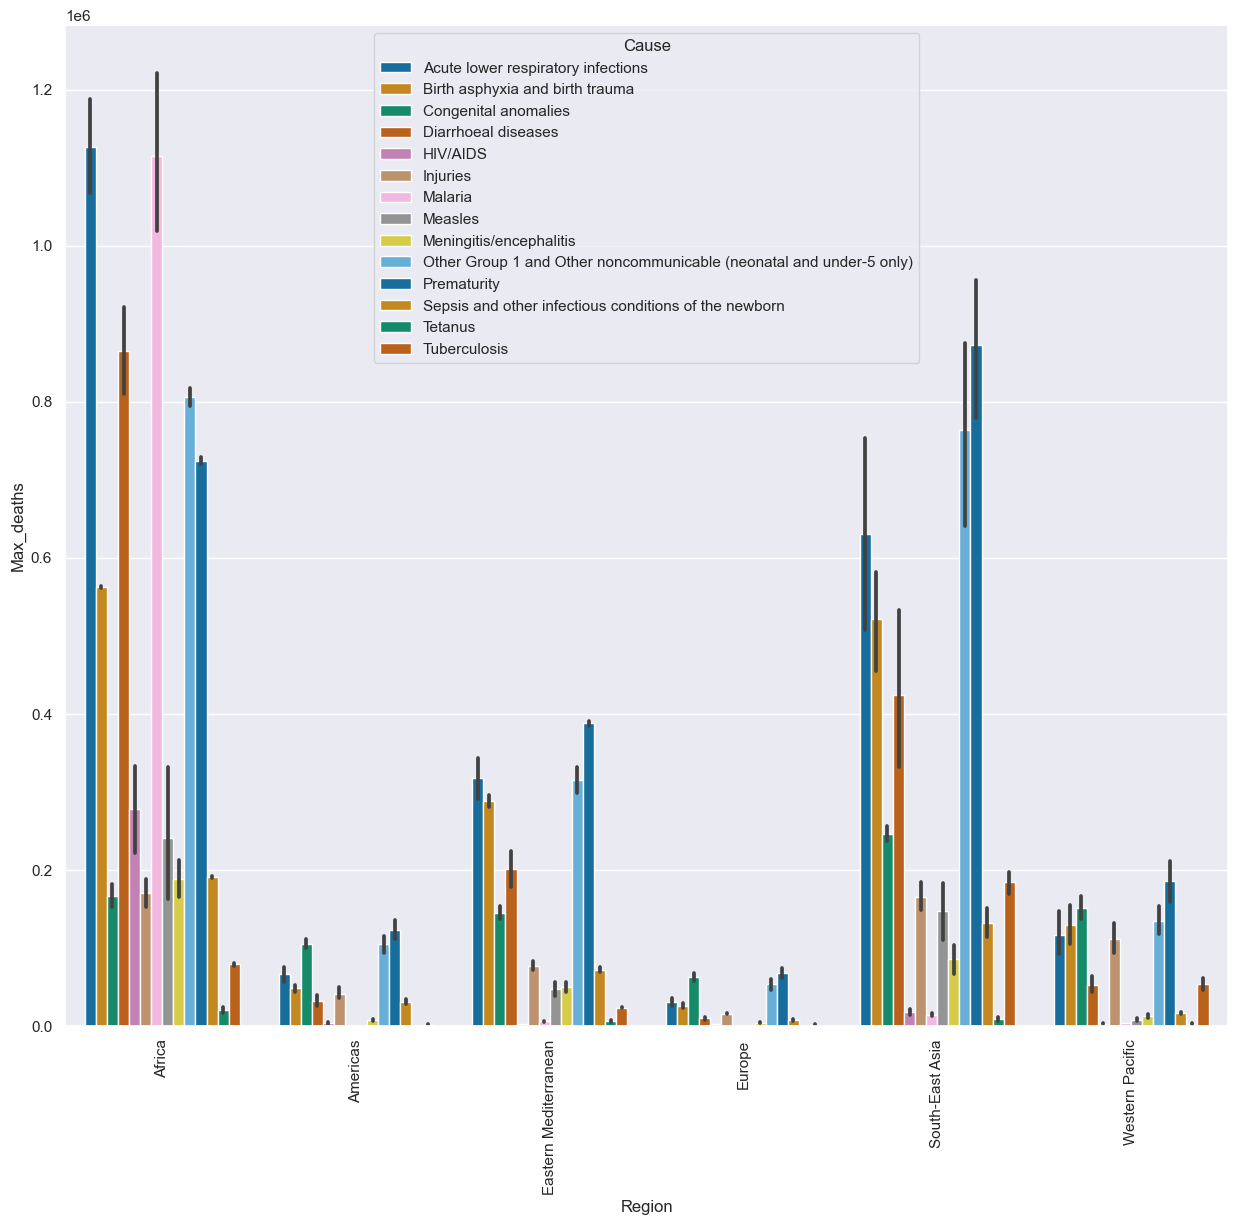

In [371]:
TotalDeaths_byCause = df.groupby(['Cause','Year','Region'], as_index=False)['Value_Numeric'].sum()

sns.barplot(x ='Region', y ='Value_Numeric', hue="Cause", data = TotalDeaths_byCause, palette = 'colorblind')
ylabel = "Max_deaths"
plt.ylabel(ylabel)
plt.rcParams['figure.figsize']=(15,13)
plt.xticks(rotation=90)

#### 2.Death rates due to vaccine preventable diseases each year

In [392]:
vaccine_preventable_diseases = ["Tetanus", "Meningitis/encephalitis", "Tuberculosis", "Measles"]

vpd = df[df["Cause"].isin(vaccine_preventable_diseases)]
vpd.head()

,Year,Country,Region,Income_group,Cause,Value_Numeric
1,2000,NaN,Africa,NaN,Tetanus,20040.15
4,2000,NaN,Africa,NaN,Tuberculosis,35446.09
9,2000,NaN,Africa,NaN,Measles,318581.00
11,2000,NaN,Africa,NaN,Meningitis/encephalitis,132731.60
15,2001,NaN,Africa,NaN,Tetanus,18818.68


#### 2.a) What is the cause for highest death rates due to vaccine preventable diseases


In [394]:
vpd.groupby(['Year','Cause']).sum().reset_index().sort_values(by = 'Value_Numeric', ascending = False)

,Year,Cause,Value_Numeric
0,2000,Measles,955264.172725
4,2001,Measles,944909.136350
12,2003,Measles,900815.031425
8,2002,Measles,811634.168866
16,2004,Measles,772996.306683
20,2005,Measles,617351.519941
1,2000,Meningitis/encephalitis,517169.429905
9,2002,Meningitis/encephalitis,510523.751301
13,2003,Meningitis/encephalitis,509808.895750
5,2001,Meningitis/encephalitis,491978.822806


Text(54.68172070312501, 0.5, 'Death_rate')

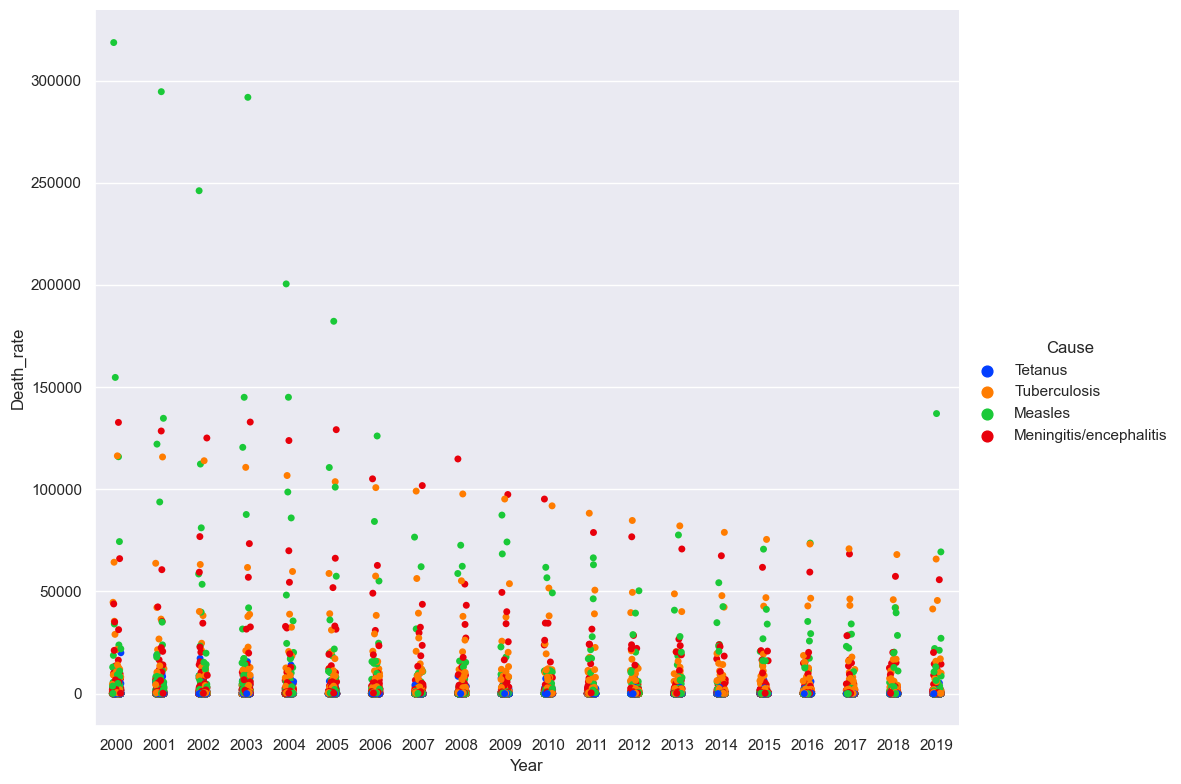

In [419]:
sns.set(font_scale=1.0)
sns.catplot(
    x='Year', 
    y='Value_Numeric', 
    data=vpd,
palette = 'bright',
hue = 'Cause', height = 8, aspect = 1.25)
plt.xlabel(
    'Year')
plt.ylabel(
    'Death_rate')

Death rates are mostly due to Measles during 2000 to 2006 post which Tuberculosis, measles and meningitis has become the cause for highest death rates.
Tetanus have always been the cause for the least death rates

In [398]:
vpd.head()

,Year,Country,Region,Income_group,Cause,Value_Numeric
1,2000,NaN,Africa,NaN,Tetanus,20040.15
4,2000,NaN,Africa,NaN,Tuberculosis,35446.09
9,2000,NaN,Africa,NaN,Measles,318581.00
11,2000,NaN,Africa,NaN,Meningitis/encephalitis,132731.60
15,2001,NaN,Africa,NaN,Tetanus,18818.68


#### 2.b) Which region has the highest death rates due to vaccine preventable diseases

In [410]:
hig_death_rate_vpd = vpd.groupby(['Region']).sum().reset_index()[['Region','Value_Numeric']].sort_values(by = 'Value_Numeric' , ascending = False)
hig_death_rate_vpd

,Region,Value_Numeric
0,Africa,1.056920e+07
4,South-East Asia,8.515379e+06
2,Eastern Mediterranean,2.519967e+06
5,Western Pacific,1.536273e+06
1,Americas,1.887969e+05
3,Europe,1.158072e+05


Text(0, 0.5, 'Death_rate')

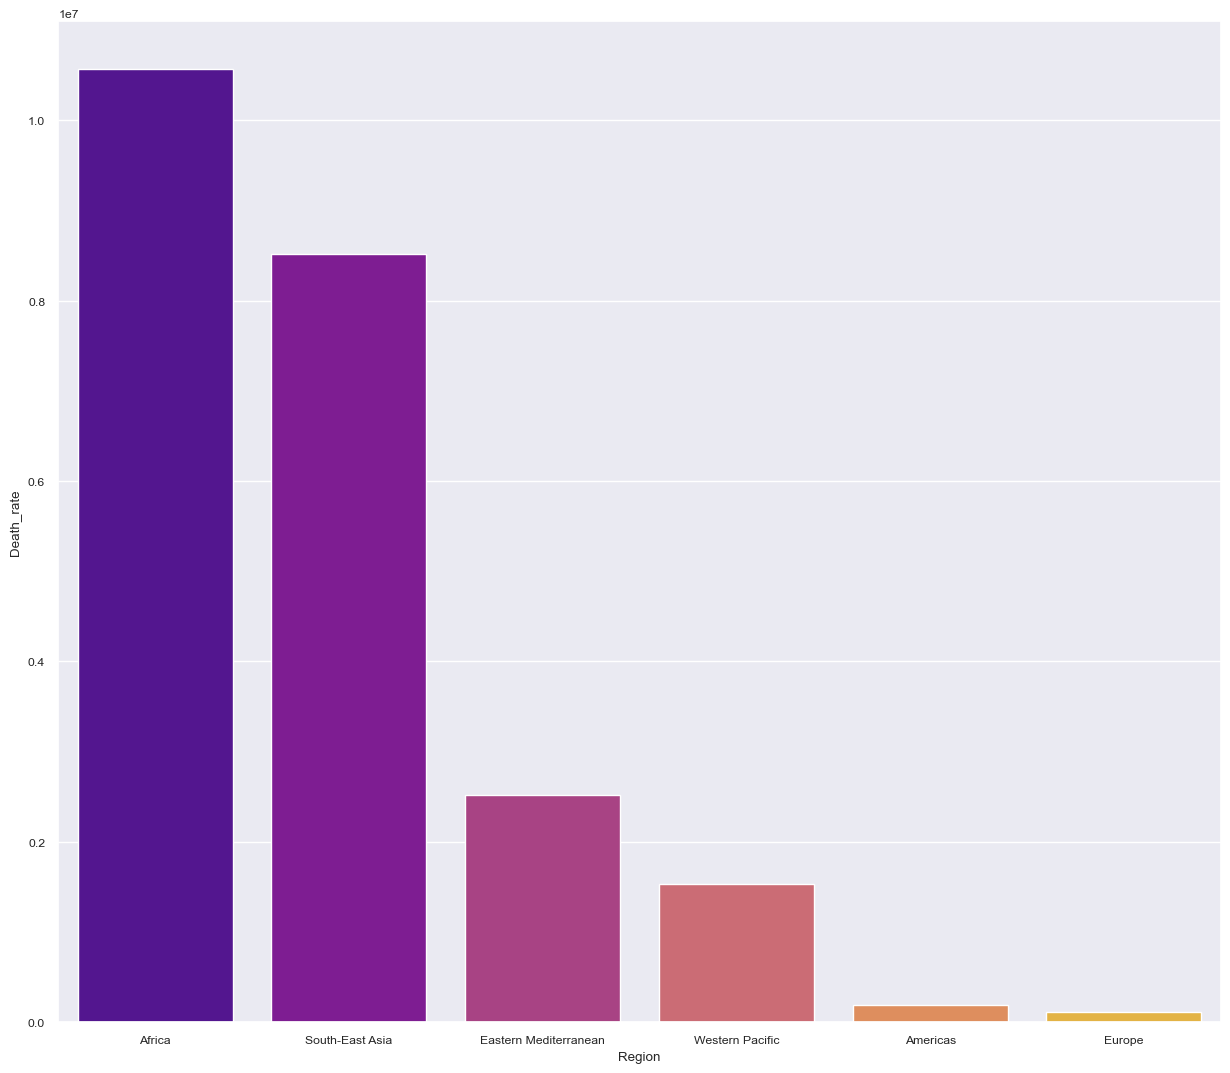

In [417]:
sns.set(font_scale=0.8)
sns.barplot(
    x='Region', 
    y='Value_Numeric', 
    data=hig_death_rate_vpd,
    palette='plasma',
    color='blue',
    estimator=sum)
plt.ylabel(
    'Death_rate')

Africa seems to have the highest death rates followed by south east asia, Eastern Mediterranean,western pacific, and lastly America and Europe.

#### 3. Which region has the highest number of under 5 mortality rates

In [435]:
region_deaths = df.groupby('Region',as_index=False)['Value_Numeric'].mean().sort_values(by='Value_Numeric', ascending = False)
region_deaths

,Region,Value_Numeric
4,South-East Asia,25085.048732
0,Africa,9724.208500
2,Eastern Mediterranean,6298.070522
5,Western Pacific,2508.884288
1,Americas,1123.076390
3,Europe,373.698384


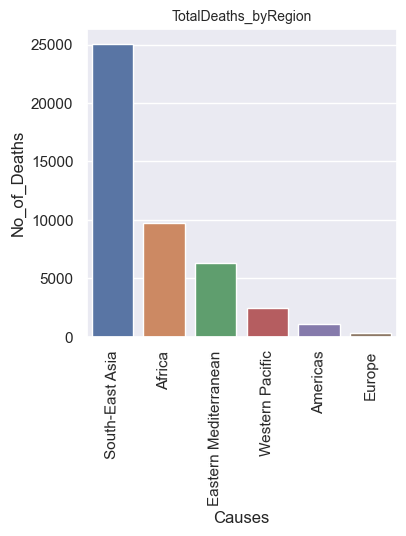

In [436]:
plt.figure(figsize=(4,4))
plt.xticks(rotation=89.5)
plt.title("TotalDeaths_byRegion",fontsize=10)
b = sns.barplot(x=region_deaths.Region, y=region_deaths.Value_Numeric)
plt.xlabel("Causes")
plt.ylabel("No_of_Deaths")
plt.show()

#### 4. Death rates by contagious diseases(ALRTI,Sepsis and other infectious conditions of the newborn,HIV,diarrhoeal diseases) and other disease conditions in all the regions

In [462]:
contagious_diseases = ["Acute lower respiratory infections","Sepsis and other infectious conditions of the newborn","HIV/AIDS",'Diarrhoeal diseases']


Disease_type = []
for row in df['Cause']:
    if row == "Acute lower respiratory infections" :    Disease_type.append('Contagious')
    elif row == "Diarrhoeal diseases":   Disease_type.append('Contagious')
    elif row == "Sepsis and other infectious conditions of the newborn":  Disease_type.append('Contagious')
    elif row == "HIV/AIDS":  Disease_type.append('Contagious')
    elif row == "Tuberculosis":  Disease_type.append('Contagious')
    elif row == "Measles":  Disease_type.append('Contagious')

    else:           Disease_type.append('Non-Contagious')

        
df['Disease_type'] = Disease_type


In [463]:
df.head()

,Year,Country,Region,Income_group,Cause,Value_Numeric,Disease_type
0,2000,NaN,Africa,NaN,Birth asphyxia and birth trauma,278103.80,Non-Contagious
1,2000,NaN,Africa,NaN,Tetanus,20040.15,Non-Contagious
2,2000,NaN,Africa,NaN,HIV/AIDS,222929.00,Contagious
3,2000,NaN,Africa,NaN,Sepsis and other infectious conditions of the ...,96900.48,Contagious
4,2000,NaN,Africa,NaN,Tuberculosis,35446.09,Contagious


In [481]:
disease = pd.DataFrame(df.groupby(['Region','Disease_type'])['Value_Numeric'].mean()).sort_values(by='Value_Numeric', ascending = False)

In [482]:
disease

Value_Numeric
Region                Disease_type                 
South-East Asia       Non-Contagious   27891.863531
                      Contagious       21342.628999
Africa                Non-Contagious    9776.476065
                      Contagious        9654.518414
Eastern Mediterranean Non-Contagious    7252.424453
                      Contagious        5025.598613
Western Pacific       Non-Contagious    3272.273731
Americas              Non-Contagious    1496.036862
Western Pacific       Contagious        1491.031697
Americas              Contagious         625.795761
Europe                Non-Contagious     532.859899
                      Contagious         161.483031

Text(0, 0.5, 'Death_rate')

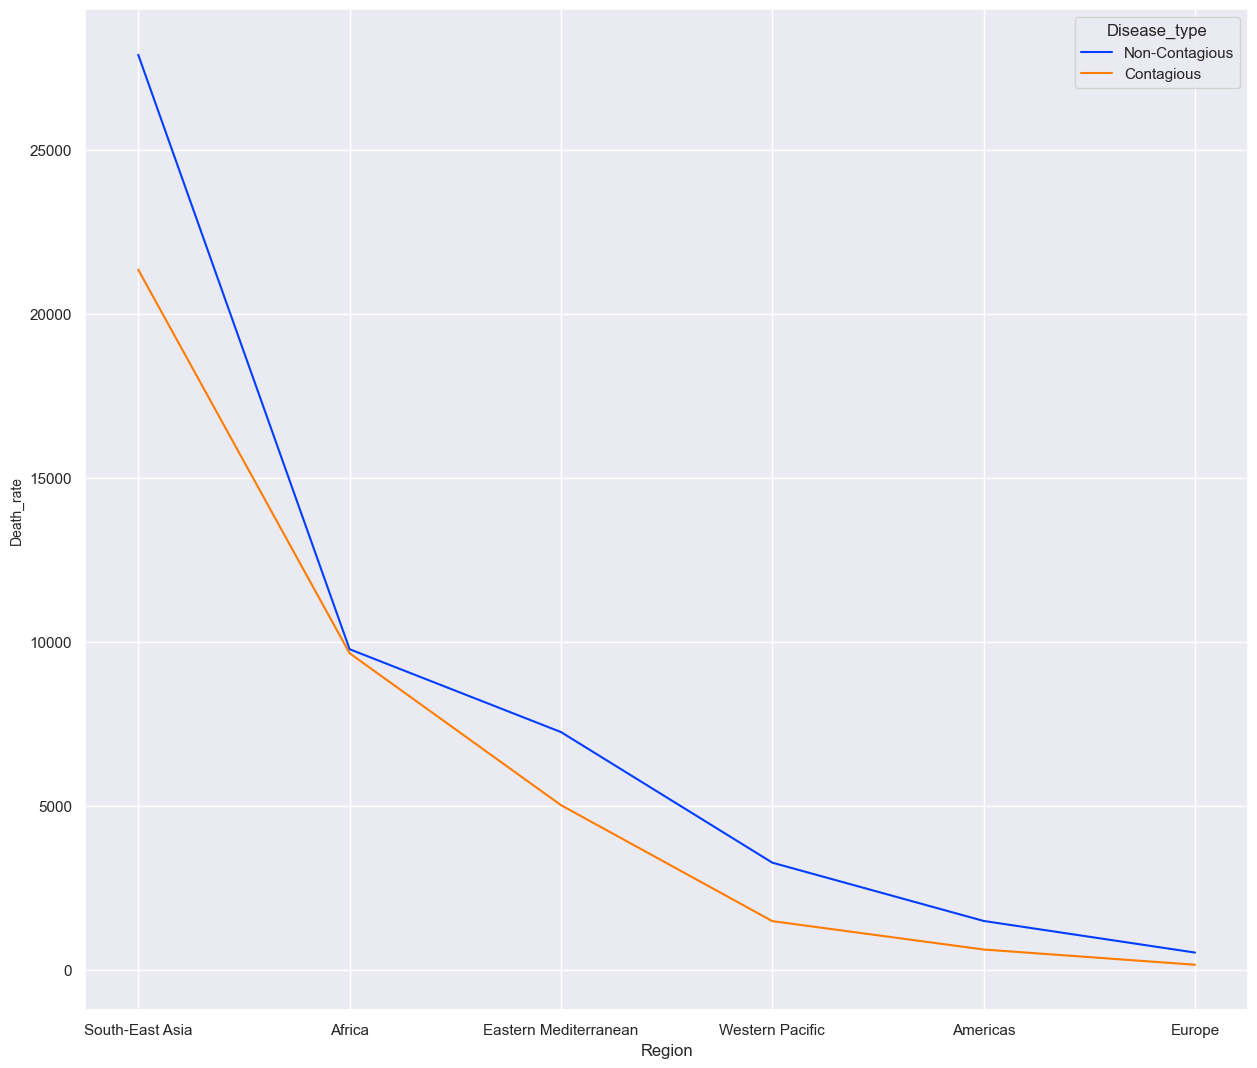

In [484]:
sns.lineplot(x="Region", y="Value_Numeric", hue="Disease_type", data=disease,palette='bright')

plt.ylabel("Death_rate",fontsize=10)

* Death rates due to non contagious diseases seems to be higher in all the countries compared to contagious disease.
* One of the reasion may be routine vaccinations are administered for contagious diseases while non contagious diseases however cannot be prevented but can be detected, screened at the early stage and provide access to palliative care for people in need
* Timely treatment and early treatment can reduce the death rates due to non contagious diseases

#### 5. Look for South east region death rate distribution

In [491]:
south = df[df['Region'] == "South-East Asia"][['Year','Country','Cause','Value_Numeric']]
south

,Year,Country,Cause,Value_Numeric
1400,2000,NaN,Diarrhoeal diseases,435195.200000
1401,2000,NaN,Meningitis/encephalitis,66069.080000
1402,2000,NaN,Acute lower respiratory infections,553188.200000
1403,2000,NaN,Malaria,8890.000000
1404,2000,NaN,Measles,115932.400000
1405,2000,NaN,Prematurity,595068.900000
1406,2000,NaN,Congenital anomalies,126782.500000
1407,2000,NaN,Tuberculosis,116372.500000
1408,2000,NaN,Other Group 1 and Other noncommunicable (neona...,667922.100000
1409,2000,NaN,Sepsis and other infectious conditions of the ...,108112.700000


<Figure size 2000x1500 with 0 Axes>

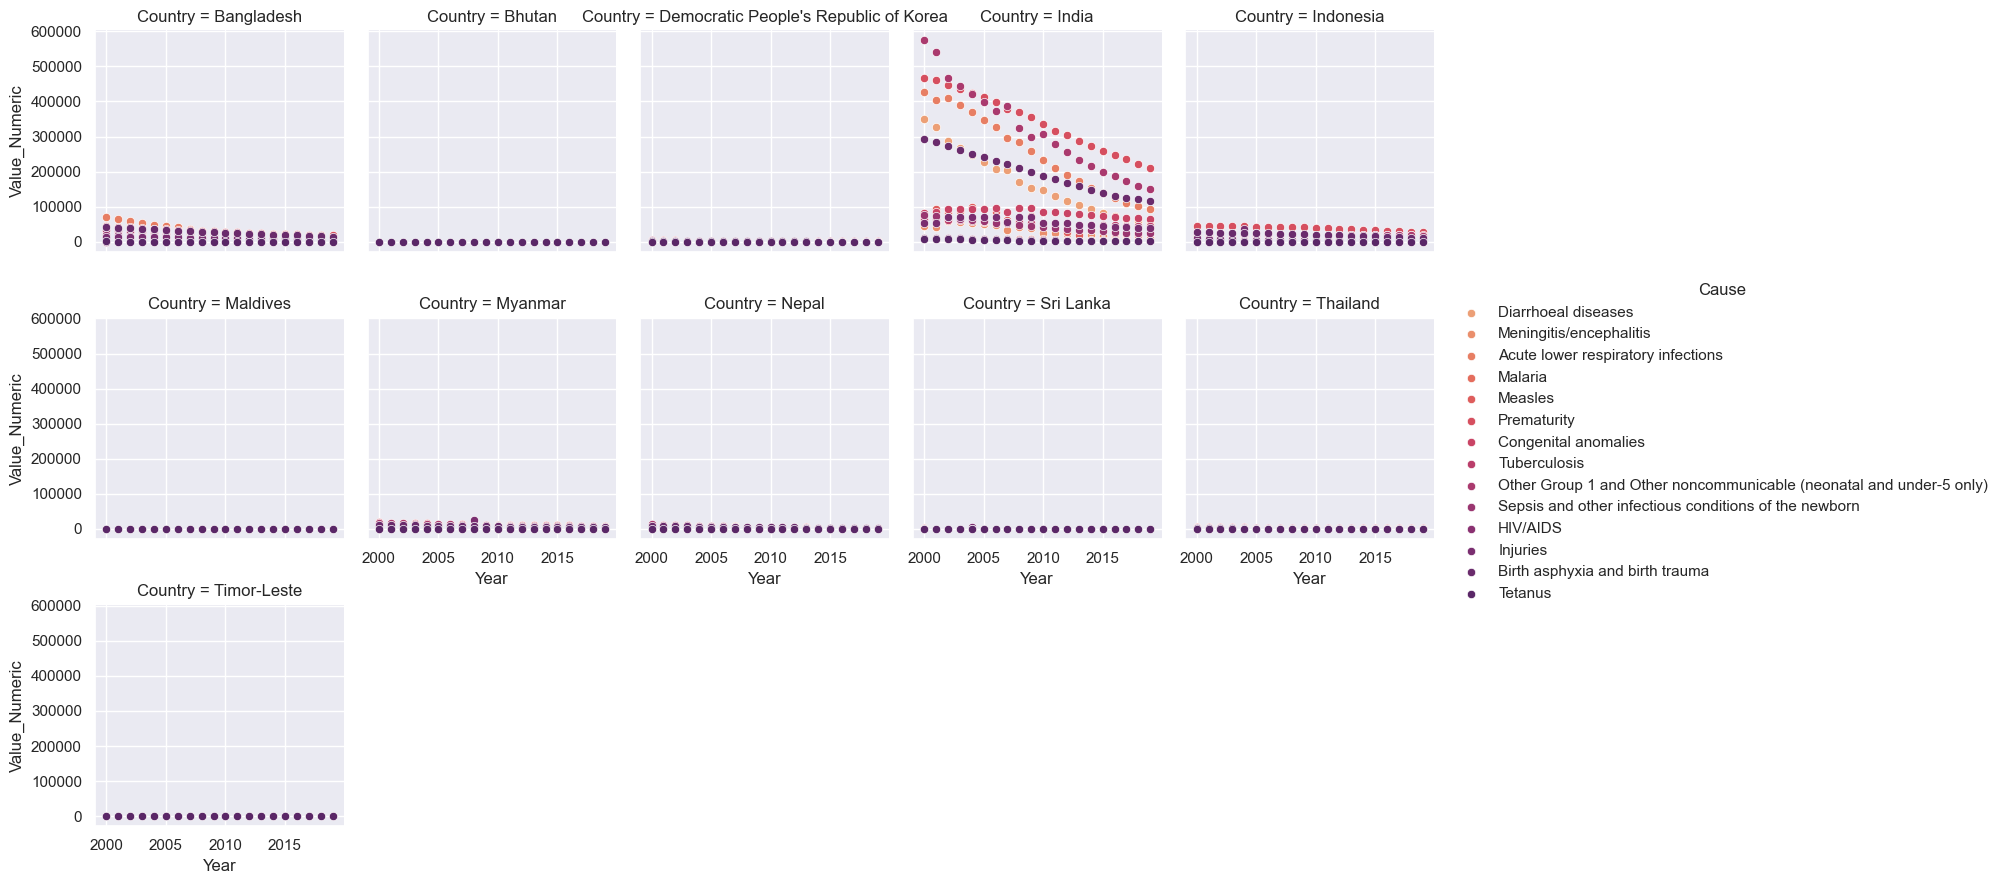

In [492]:
fig = plt.gcf()
fig.set_size_inches(20, 15)
grid = sns.FacetGrid(south , col = 'Country', hue = 'Cause',palette ='flare', col_wrap=5)
grid.map(sns.scatterplot, "Year","Value_Numeric" )

grid.add_legend()
plt.show()

#### 6. Look into India's death rate data

In [496]:
india = df[df['Country'] == "India"][['Year','Country','Cause','Value_Numeric']]
india

,Year,Country,Cause,Value_Numeric
23800,2000,India,Diarrhoeal diseases,350438.6000
23801,2000,India,Meningitis/encephalitis,43910.7400
23802,2000,India,Acute lower respiratory infections,428210.6000
23803,2000,India,Measles,74423.4300
23804,2000,India,Other Group 1 and Other noncommunicable (neona...,573743.2000
23805,2000,India,Prematurity,465629.8000
23806,2000,India,Malaria,7328.0000
23807,2000,India,Sepsis and other infectious conditions of the ...,75675.8800
23808,2000,India,Tuberculosis,64325.0800
23809,2000,India,Congenital anomalies,83045.7800


In [504]:
india_disease = india.groupby('Cause').sum().reset_index()[['Cause','Value_Numeric']].sort_values(by='Value_Numeric', ascending = False)
india_disease

,Cause,Value_Numeric
10,Prematurity,6.835331e+06
9,Other Group 1 and Other noncommunicable (neona...,6.387380e+06
0,Acute lower respiratory infections,5.043821e+06
1,Birth asphyxia and birth trauma,3.935937e+06
3,Diarrhoeal diseases,3.361372e+06
2,Congenital anomalies,1.667766e+06
5,Injuries,1.117644e+06
13,Tuberculosis,1.075076e+06
7,Measles,1.067124e+06
11,Sepsis and other infectious conditions of the ...,9.228670e+05


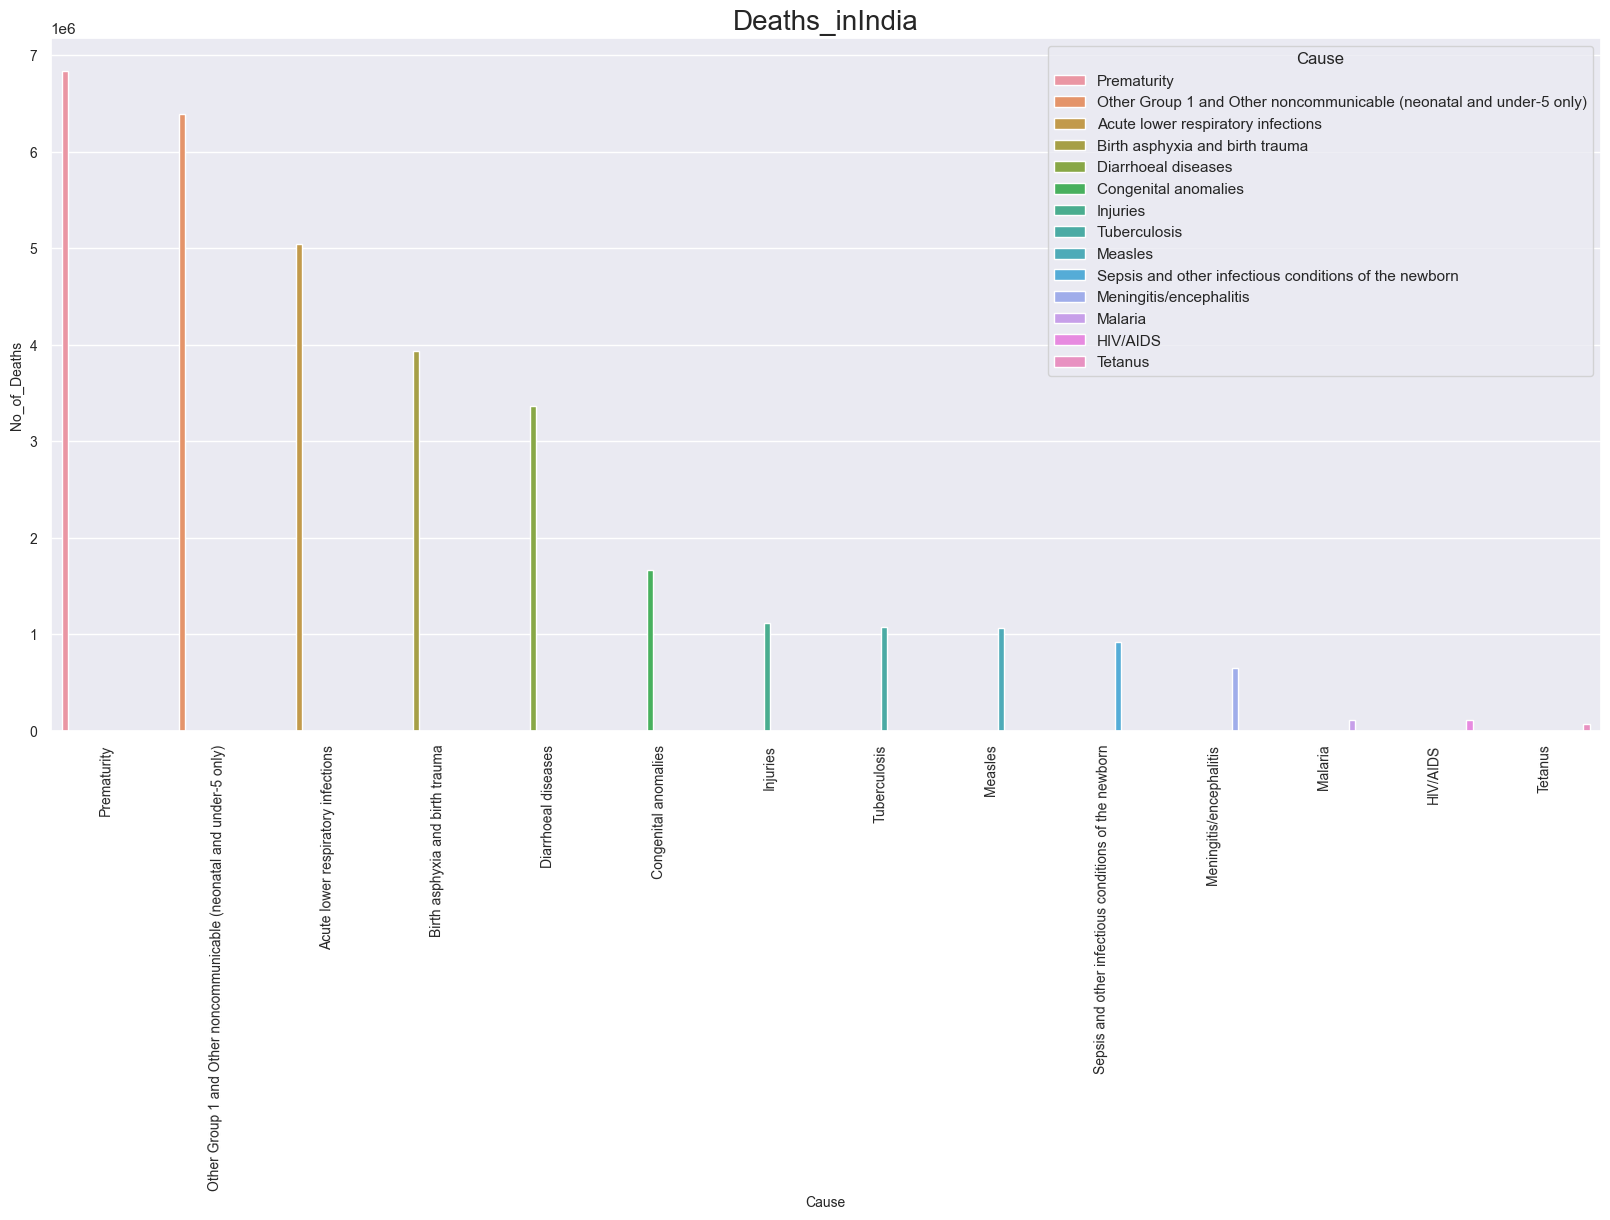

In [505]:
plt.figure(figsize=(20,9))
plt.xticks(rotation=89.5)
plt.title("Deaths_inIndia",fontsize=20)
b = sns.barplot(x=india_disease.Cause, y=india_disease.Value_Numeric, hue =india_disease.Cause)
plt.xlabel("Cause",fontsize=10)
plt.ylabel("No_of_Deaths",fontsize=10)
# b.set_xlabel("X Label",fontsize=30)
# b.set_ylabel("Y Label",fontsize=20)
plt.tick_params(labelsize=10)
plt.show();

### IV. Income group

#### 1. What income group does India have

In [509]:
india_income = df[df['Country'] == "India"][['Year','Country','Cause','Income_group','Value_Numeric']]
india_income['Income_group'].unique()

array(['Lower middle income'], dtype=object)

India has only Lower middle income group

#### 2. Take out Income group for all the countries

In [516]:
Income_group = df.groupby(['Income_group','Cause','Year','Region'], as_index=False)['Value_Numeric'].sum()


<Axes: xlabel='Income_group', ylabel='count'>

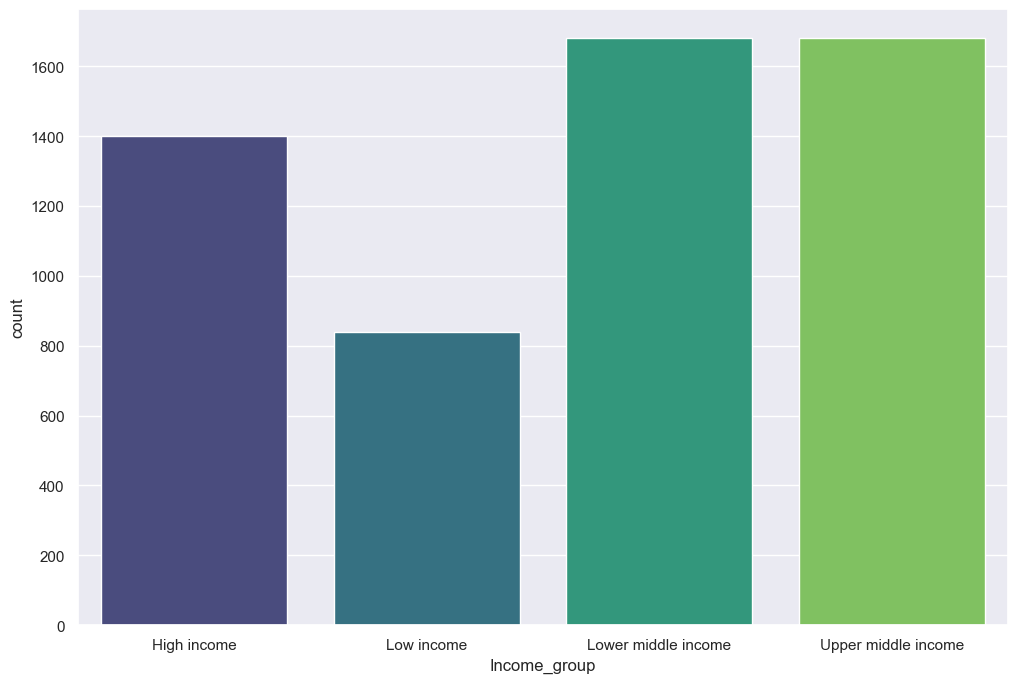

In [518]:
plt.figure(figsize=(12,8))
#colors = ['blue','green','orange', 'red']
sns.countplot(x='Income_group',data =Income_group,palette='viridis' )

Lower middle income and upper middle income count is more overall
Death rates are higher in the Lower middle income group, followed by Low income. High income shows no much death rates at all

#### 3.Find out the which Region has which income groups

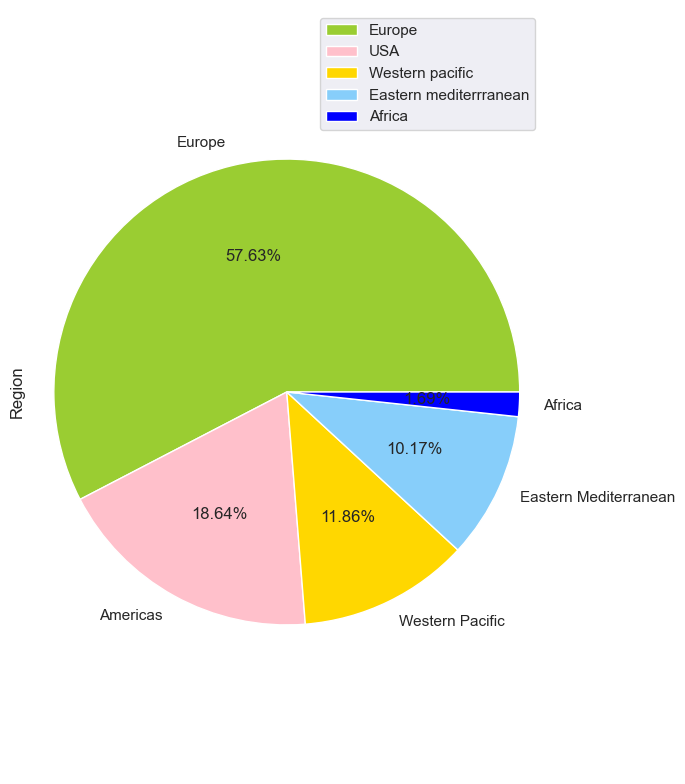

In [521]:
labels = ['Europe', 'USA','Western pacific', 'Eastern mediterrranean','Africa']
plt.figure(figsize=(7,8))
colors = ['yellowgreen','pink', 'gold', 'lightskyblue', 'blue',"red"]
df[df['Income_group']== 'High income']['Region'].value_counts().sort_values(ascending=False).plot.pie(colors=colors,autopct='%1.2f%%')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

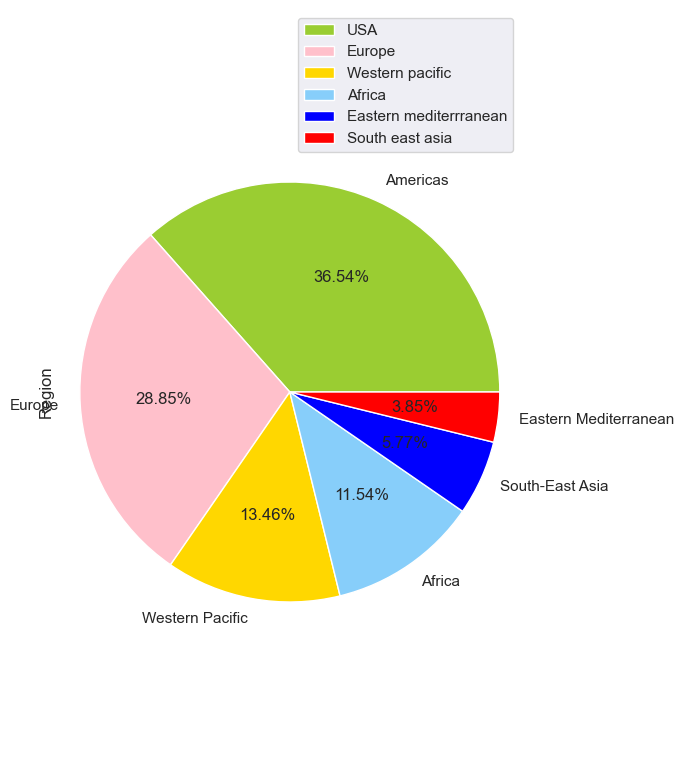

In [522]:
labels = ['USA', 'Europe','Western pacific', 'Africa','Eastern mediterrranean','South east asia']
plt.figure(figsize=(7,8))
colors = ['yellowgreen','pink', 'gold', 'lightskyblue', 'blue',"red"]
df[df['Income_group']== 'Upper middle income']['Region'].value_counts().sort_values(ascending=False).plot.pie(colors=colors,autopct='%1.2f%%')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

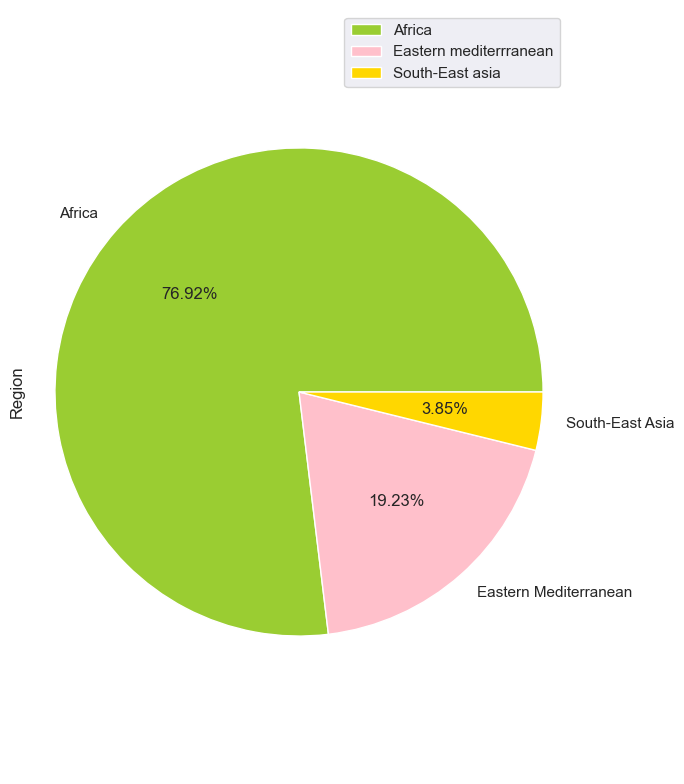

In [524]:
labels = ['Africa', 'Eastern mediterrranean','South-East asia']
plt.figure(figsize=(7,8))
colors = ['yellowgreen','pink', 'gold', 'lightskyblue', 'blue',"red"]
df[df['Income_group']== 'Low income']['Region'].value_counts().sort_values(ascending=False).plot.pie(colors=colors,autopct='%1.2f%%')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

### Inferences and conclusion

### Problem Statement


#### Year

1. PROBLEM STATEMENT :Is there a correlation between the year and mortality rates

ANS: There is a negative correlation between the Year and Number of under 5 deaths which means as the year increases the number of deaths has decreased

The year 2000 has approximately 19.8 million under 5 mortality rates which is the highest of all the years

But in the year 2019 the under 5 mortality rate has gone very much down from 19.8 million to around 10.5 million which is the lowest

This may be due to various medical advances, Vaccination coverage and new diagnostic studies

2. PROBLEM STATEMENT: Each year which cause was the reason for maximum under5 mortality rates and which region gave the maximum death rates each year.

ANS: From the year 2000 to 2007 Acute lower respiratory infections has been the causes of maximum deaths and from 2008 to 2019 Prematurity has been the cause of maximum deaths

The next most common cause for max death rate is ALRTI which is mostly caused because of FLU

There are many different flu viruses that circulate every year

Despite being vaccinated kids still get FLU as a flu vaccine is made to protect against the three or four flu viruses that research suggests will be most common. There are many other different flu viruses that circulate every year

#### Cause
1. PROBLEM STATEMENT: Maximum death rates by each cause

ANS: Malaria has the highest max deaths, followed by non communicable diseases, Acute lower respiratory infections, prematurity and Diarrhoeal diseases.

Diarrhoeal diseases cause the next max death rate may be due to poor hygienic practices in many countries and also might be due to poor nutritional status

Prematurity is because as many countries is unable to provide Specialized supportive care for the prematured babies

2. PROBLEM STATEMENT: Which cause was the reason for most no of deaths

ANS: Prematurity and Acute lower respiratory infections has been the cause for max death rates

3. PROBLEM STATEMENT: Total death rate due to each cause throughout the years

ANS:  Acute lower respiratory infections seems to be the cause of highest death rates globally

#### Region

1. PROBLEM STATEMENT: Which region(along with the cause) has the highest(max) overall under5 death rates

We know Acute lower respiratory infections and Prematurity are the reason for max death rates but we need to know which region had those max death rates

ANS: Africa had the highest death rates due to both Prematurity and ALRTI, followed by South-East Asia due to ALRTI,
Europe and America has the lowest death rates of all

2. PROBLEM STATEMENT: 2.a) What is the cause for highest death rates due to vaccine preventable diseases 2.b) Which region has the highest death rates due to vaccine preventable diseases

ANS: 2.a)Death rates are mostly due to Measles during 2000 to 2006 post which Tuberculosis, measles and meningitis has become the cause for highest death rates.

Tetanus have always been the cause for the least death rates

ANS: 2.b)Africa seems to have the highest death rates due followed by south east asia

Europe and America have the least death rates due to vaccine preventable diseases.

Africa is the second most populous region may be the vaccination coverage is less

Certain people doubt the vaccine safety may be that is why the death rates are high in India and Africa even for vaccine preventable diseases

In the year 2019 Africa still seems to have the highest death rates among all the other countries

3. PROBLEM STATEMENT: Which region has the highest number of under 5 mortality rates

ANS: South East Asia seems to have the highest under 5 mortality rates overall

4. PROBLEM STATEMENT: Death rates by contagious diseases(ALRTI,Sepsis and other infectious conditions of the newborn,HIV,diarrhoeal diseases) in all the regions

ANS: Death rates due to non contagious diseases seems to be higher in all the countries compared to contagious disease
one of the reasion may be routine vaccinations are administered for contagious diseases while non contagious diseases however cannot be prevented but can be detected, screened at the early stage and provide access to palliative care for people in need
Timely treatment and early treatment can reduce the death rates due to non contagious diseases

5. PROBLEM STATEMENT: Look for South east region death rate distribution

ANS: India seems to have the highest death rates compared to other South-East asian countries
However India's population is higher than all the other countries population

6. PROBLEM STATEMENT: Look into India's death rate data

ANS: Highest death rate is due to prematurity followed by other non communicable diseases followed by birth asphyxia
Common non communicable diseases include anaemia, asthma, cancers, heart diseases

#### Income group

1. PROBLEM STATEMENT: Which income group people have most death rates

ANS: Death rates in the Lower middle income group is more, followed by Low income. High income shows no much death rates at all

2. PROBLEM STATEMENT: Take out Income group for all the countries

ANS: Lower middle income and upper middle income count is more overall

3. PROBLEM STATEMENT: Find out the which Region has which income groups

ANS: USA and Europe seems to have more of Upper middle income group
Europe has the most high income groups among all the other countries
Africa has the most low income groups among all the other countries
